# PART V: COPMPREHESIVE DATA ANALYSIS AND PROJECT INSIGHTS

This section covers all results from previous sections and create a final conclution.

## 0. GENERAL

### 0.1 Load module

In [1]:
# Load nessesary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode


### 0.2 Load dataset

In [31]:
df_jobseeker = pd.read_csv('data_jobseeker.csv', index_col=None)

## 1. JOB SEEKERS

In [32]:
print('The JOB SEEKERS df has the following shape:', df_jobseeker.shape)
print('The columns of the df are:', ', '.join(df_jobseeker.columns.tolist()))

df_jobseeker

The JOB SEEKERS df has the following shape: (3, 8)
The columns of the df are: participant, data_collection, date, location, preferred_position, education, skill, experience


,participant,data_collection,date,location,preferred_position,education,skill,experience
0,user_1,voice call,2023-12-17 15:30:00,"dublin, ireland",registered nurse,bachelor's degree: critical care nursing,"patient care, wound care, medical procedures, ...",registered nurse: 3 years
1,user_2,voice call,2023-12-27 11:50:00,"dublin, ireland",electrician,"high school diploma, vocational electrician ce...","circuit testing, blueprint reading, fault find...",residential electrician's helper: 1 year
2,user_3,google form,2023-12-31 13:39:00,"dublin, ireland",data analyst,"degree: master of science in data analytics, b...","python, data mining and extraction, data analy...",entry level data analyst: 1 year; data coordin...


*Interpretation:*
The JOB SEEKERS dataframe contains information of three individuals participating in the experiment. The participants are based in the Dublin area, and their data was collected on various dates in December 2023. They shared their job search details through voice calls and Google Forms. Notably, each participant expressed their preferred search for job positions and provided detailed information regarding their education, skills, and work experience.

In [33]:
df_jobseeker['combined_info'] = df_jobseeker.education + '. ' + df_jobseeker.skill + '. ' + df_jobseeker.experience + '.'
df_jobseeker.drop(['education', 'skill', 'experience'], axis=1, inplace=True)
df_jobseeker['word_count'] = df_jobseeker['combined_info'].apply(lambda x: len(x.split()))

for index, row in df_jobseeker.iterrows():
    # Print the value of the 'combined_info' column for the current row
    print(row['combined_info'])

bachelor's degree: critical care nursing. patient care, wound care, medical procedures, adult nursing, infection control, diagnostic, time management, communication skills, attention to detail. registered nurse: 3 years.
high school diploma, vocational electrician certification, construction safety certification. circuit testing, blueprint reading, fault finding, electrical wiring, troubleshooting, equipment inspection, installation, organization, maintenance, diagnostic, independent worker, safety knowledge. residential electrician's helper: 1 year.
degree: master of science in data analytics, bachelor of science in business administration; certifications: microsoft certified - azure data scientist associate, google data analytics certificate. python, data mining and extraction, data analytics and visualization, etl pipeline, data reporting, database management systems, sql and nosql, machine learning, a/b testing, data governance. entry level data analyst: 1 year; data coordinator: 2

In [ ]:
# Difine a costum function to process DFs containing cosine similarity scores for the specified user.
def process_cosine_data(cosine_bert, cosine_word2vec, cosine_tfidf, user):
    cosine_user = cosine_bert.copy()
    
    # Drop columns not related to the specified user and rename the relevant column.
    drop_columns = [f'cos_{u}' for u in ['user1', 'user2', 'user3'] if u != user]
    cosine_user = cosine_user.drop(columns=drop_columns).rename(columns={f'cos_{user}': 'cos_bert'})
    
    # Add word2vec and tfidf values for the user to the dataframe.
    cosine_user['cos_word2vec'] = cosine_word2vec[f'cos_{user}'].tolist()
    cosine_user['cos_tfidf'] = cosine_tfidf[f'cos_{user}'].tolist()
    
    return cosine_user

In [24]:
# Reading the CSV files containing cosine similarity scores into pandas DF.
cosine_bert = pd.read_csv('cosine_bert.csv', index_col=None)
cosine_word2vec = pd.read_csv('cosine_word2vec.csv', index_col=None)
cosine_tfidf = pd.read_csv('cosine_tfidf.csv', index_col=None)


In [ ]:
# Use the costum function and process DFs for each user.
user1_data = process_cosine_data(cosine_bert, cosine_word2vec, cosine_tfidf, 'user1')
user2_data = process_cosine_data(cosine_bert, cosine_word2vec, cosine_tfidf, 'user2')
user3_data = process_cosine_data(cosine_bert, cosine_word2vec, cosine_tfidf, 'user3')

**summary statistics**

In [26]:
# Show summary statistics for user1_data (for user 'nurse').
summary_stats1 = user1_data.describe()
print('Summary statistics for <user1 = nurse>:'.upper(), '\n\n', summary_stats1)

SUMMARY STATISTICS FOR <USER1 = NURSE>: 

         word_count     cos_bert  cos_word2vec    cos_tfidf
count  1166.000000  1166.000000   1166.000000  1166.000000
mean    332.466552     0.319900      0.665213     0.141654
std     301.366781     0.388131      0.082701     0.111163
min      10.000000    -0.199576      0.391409     0.000000
25%     137.250000    -0.109479      0.594835     0.056245
50%     233.000000     0.621242      0.658452     0.100525
75%     442.750000     0.678452      0.740086     0.219451
max    3145.000000     0.727966      0.856020     0.529536


Interpretation
- ***word_count***: The statistics for word count remain consistent across the DFs for all three users, as each user's cosine similarity was calculated using the same set of job advertisements. The mean word count stands at approximately 332 words, suggesting that the average length of the text extracted from Indeed.com is somewhere around 330 words. Nonetheless, there is a wide variation in the length of job ads, with word counts ranging from as few as 10 to as many as 3145 words and the standard deviation is about 301 words, suggesting a wide variation in text lengths, from very short to quite lengthy documents. The 25th percentile is around 137 words, the median (50th percentile) is 233 words, and the 75th percentile is about 443 words, confirming the broad spread in document lengths.
- ***cos_bert***: The average cos_bert score is 0.3199, indicating a moderate level of semantic similarity across the documents when analyzed with BERT, a contextual language model. The scores range from -0.1996 to 0.728, showing that some document pairs are seen as somewhat dissimilar (negative values) while others are highly similar. The data exhibits a wide distribution (std of 0.3881), suggesting varied degrees of semantic similarity among document pairs as per BERT's analysis.
- ***cos_word2vec***: A higher average cosine similarity of 0.67 indicates a generally higher level of similarity across documents using Word2Vec embeddings compared to BERT. The standard deviation is lower (0.08) than for BERT, suggesting less variability in similarity scores with Word2Vec. The minimum and percentile values suggest a range of similarities, with most documents being moderately to highly similar.
- ***cos_tfidf***: The average cosine similarity of 0.14 is much lower than for the other two methods, indicating a lower level of textual similarity across documents when using TF-IDF vectors. A lower standard deviation (0.11) and the range of values suggest that, while there is variability, documents tend to be less similar to each other based on TF-IDF scores.

In [37]:
# Show summary statistics for user2_data (for user 'electrician').
summary_stats2 = user2_data.describe()
print('Summary statistics for <user2 = electrician>:'.upper(), '\n', summary_stats2)

SUMMARY STATISTICS FOR <USER2 = ELECTRICIAN>: 
         word_count     cos_bert  cos_word2vec    cos_tfidf
count  1166.000000  1166.000000   1166.000000  1166.000000
mean    332.466552    -0.025889      0.600000     0.038741
std     301.366781     0.250511      0.057276     0.052500
min      10.000000    -0.242510      0.352230     0.000000
25%     137.250000    -0.172927      0.561716     0.010862
50%     233.000000    -0.090811      0.592295     0.021460
75%     442.750000    -0.065748      0.621538     0.040316
max    3145.000000     0.719622      0.831225     0.329614


Interpretation
- ***word_count***: The statistics for word count remain consistent across the DFs for all three users, as each user's cosine similarity was calculated using the same set of job advertisements.
- ***cos_bert***: The average cosine similarity is -0.025, suggesting a slight overall dissimilarity between documents when analyzed with BERT embeddings. This is a stark contrast to the Nurse's data, which had a positive mean, indicating more similarity. The standard deviation is lower (0.25) compared to the Nurse's, indicating less variability in the similarity scores. The range from -0.243 to 0.720 shows some documents are very dissimilar while others are quite similar, albeit the majority lean towards dissimilarity.
- ***cos_word2vec***: The average similarity score of 0.60 suggests a moderate level of similarity between documents, lower than that observed for the Nurse. This indicates that the documents associated with the Electrician share fewer semantic similarities. A relatively low standard deviation (0.057) suggests that the similarity scores are more consistent across the dataset than those for the Nurse. The minimum and maximum values indicate a narrower range of similarity scores compared to the Nurse's data.
- ***cos_tfidf***: The average similarity of 0.039 is significantly lower than that of the Nurse, suggesting that the documents are generally quite dissimilar based on the commonality and importance of terms. The standard deviation and the range of values indicate a relatively low variability in similarity scores, with most documents being less similar to each other.

In [38]:
# Show summary statistics for user3_data (for user 'data analyst').
summary_stats3 = user3_data.describe()
print('Summary statistics for <user3 = data analyst>:'.upper(), '\n\n', summary_stats3)

SUMMARY STATISTICS FOR <USER3 = DATA ANALYST>: 

         word_count     cos_bert  cos_word2vec    cos_tfidf
count  1166.000000  1166.000000   1166.000000  1166.000000
mean    332.466552     0.156274      0.573476     0.079308
std     301.366781     0.355753      0.071010     0.116556
min      10.000000    -0.164118      0.271790     0.000000
25%     137.250000    -0.107856      0.523822     0.014595
50%     233.000000    -0.068212      0.563920     0.033232
75%     442.750000     0.625446      0.610304     0.101983
max    3145.000000     0.736383      0.828246     0.639187


Interpretation
- ***word_count***: The statistics for word count remain consistent across the DFs for all three users, as each user's cosine similarity was calculated using the same set of job advertisements.
- ***cos_bert***: The average cosine similarity of 0.156 indicates a moderate level of similarity between documents, with a positive tilt suggesting some degree of similarity in content or context when analyzed with BERT embeddings. A relatively high standard deviation (0.356) suggests a wide variability in similarity scores, indicating that some document pairs are found to be quite similar while others are more dissimilar. The range from -0.164 to 0.736 shows variability in document similarity, with the maximum score indicating very high similarity in at least some document comparisons.
- ***cos_word2vec***: An average similarity score of 0.573 suggests a moderate level of semantic similarity between documents, albeit lower than observed for the Nurse but higher than the Electrician. The standard deviation (0.071) indicates less variability in similarity scores than BERT, suggesting more consistent semantic relationships across the dataset. The range from 0.272 to 0.828 reflects a spectrum of semantic similarities, from relatively low to very high.
- ***cos_tfidf***: The average similarity of 0.079 is higher than that of the Electrician but lower than the Nurse, indicating a moderate level of dissimilarity based on term frequency and document uniqueness. The relatively high standard deviation (0.117) and the range up to 0.639 indicate that while many documents share few common terms, some pairs share a significant amount of unique terms, leading to higher similarity scores.

**Conclution:** Overall, analyzing the summary statistics for similarity scores across all three users, it indicates that the length of job advertisements can vary significantly, with some ads containing as few as 10 words and others extending up to 3000 words. The BERT model demonstrates the widest range in document similarity, from -0.243 to 0.736, suggesting that it is more capable of identifying both similarity and dissimilarity in job ads compared to the other models. The Word2Vec model, on average, shows the highest mean similarity score across users, implying that it may not be as effective in distinguishing dissimilarities between texts in job ads. This observation might extend to the TF-IDF and Bag of Words (BoW) models as well, given that their text vector representations did not produce any cosine similarity scores below 0, indicating a potential limitation in detecting dissimilarities. Additionally, both the TF-IDF and Word2Vec methods exhibit a lower standard deviation in similarity scores compared to BERT, suggesting they maintain a more consistent level of similarity or dissimilarity across the dataset.

**visualizations**

Conclusions can be drawn from statistical numbers alone, but to enhance understanding and support the overall analysis, adding visualizations is important.

*word count*

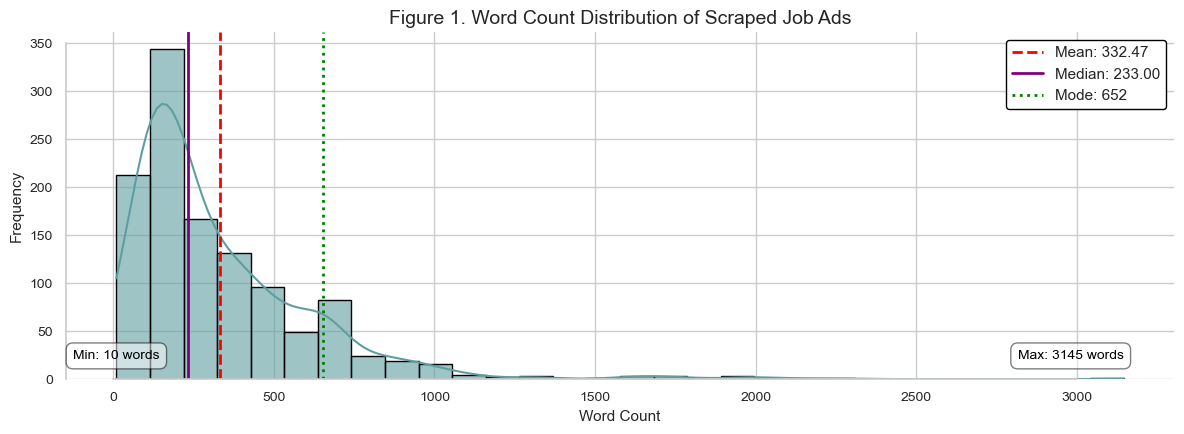

In [87]:
# Plot word count distribution of scraped job ads
sns.set(style='whitegrid')
plt.figure(figsize=(12, 4.5))

sns.histplot(user1_data['word_count'], bins=30, kde=True, color='cadetblue', edgecolor='black', alpha=0.6)

plt.title('Figure 1. Word Count Distribution of Scraped Job Ads', fontsize=14)
plt.xlabel('Word Count', fontsize=11)
plt.ylabel('Frequency', fontsize=11)

# Calculating mean, median, max, min, and mode word counts
mean_word_count = user1_data['word_count'].mean()
median_word_count = user1_data['word_count'].median()
max_word_count = user1_data['word_count'].max()
min_word_count = user1_data['word_count'].min()
mode_word_count = user1_data['word_count'].mode()[0]  # Mode could have multiple values; take the first one if so

# Adding vertical lines for mean, median, and mode word counts
plt.axvline(mean_word_count, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_word_count:.2f}')
plt.axvline(median_word_count, color='purple', linestyle='-', linewidth=2, label=f'Median: {median_word_count:.2f}')
plt.axvline(mode_word_count, color='green', linestyle=':', linewidth=2, label=f'Mode: {mode_word_count}')

# Setting up coordinates for text annotations at the bottom of the plot
bottom_y_coord = plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.05

# Adding text annotations for max and min word counts
plt.text(max_word_count, bottom_y_coord, f'Max: {max_word_count} words', color='black', fontsize=10,
         ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(min_word_count, bottom_y_coord, f'Min: {min_word_count} words', color='black', fontsize=10,
         ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

plt.legend(frameon=True, facecolor='white', framealpha=1, edgecolor='black')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(trim=True)
plt.tight_layout()

plt.show()


Interpretation: The right skewed distribution above shows that the words length of the text for job ads that was extracted form the Indeed.com 

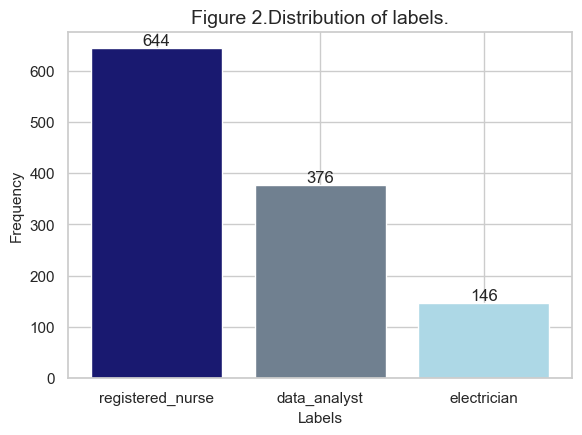

In [80]:
sns.set(style='whitegrid')
label_counts = user1_data['label'].value_counts()
    
plt.figure(figsize=(6.5, 4.5))

color_list = ['midnightblue', 'slategray', 'lightblue']
bars = plt.bar(label_counts.index, label_counts.values, color=color_list)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.title('Figure 2.Distribution of labels.', fontsize=14)
plt.xlabel('Labels', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
    
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Setting up the figure for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for col in ['cos_bert', 'cos_word2vec', 'cos_tfidf']:
    sns.kdeplot(cosine_user1[col], label=col, fill=True, ax=axes[0])
axes[0].set_title('distribution: USER1')
axes[0].set_ylabel('Density')
axes[0].legend()

for col in ['cos_bert', 'cos_word2vec', 'cos_tfidf']:
    sns.kdeplot(cosine_user2[col], label=col, fill=True, ax=axes[1])
axes[1].set_title('distribution: USER2')
axes[1].set_xlabel('Cosine Similarity')

for col in ['cos_bert', 'cos_word2vec', 'cos_tfidf']:
    sns.kdeplot(cosine_user3[col], label=col, fill=True, ax=axes[2])
axes[2].set_title('distribution: USER3')
axes[1].legend()
axes[2].legend()

plt.tight_layout()
plt.show()


In [ ]:
# Assuming df is your DataFrame
positive_cos_bert_rn = len(cosine_user1[(cosine_user1['cos_bert'] > 0) & (cosine_user1['label'] == 'registered_nurse')])
positive_cos_bert_el = len(cosine_user2[(cosine_user2['cos_bert'] > 0) & (cosine_user2['label'] == 'electrician')])
positive_cos_bert_da = len(cosine_user3[(cosine_user3['cos_bert'] > 0) & (cosine_user3['label'] == 'data_analyst')])

print(f'Total number for registered nurse job positions to user1 is: {positive_cos_bert_rn}'+'\n'+
      f'Total number for electician job positions to user2 is: {positive_cos_bert_el}'+'\n'+
      f'Total number for data analyst job positions to user3 is: {positive_cos_bert_da}')

interpretation: 

- *word count*: The statistics for word count remain consistent across the DFs for all three users, as each user's cosine similarity was calculated using the same set of job advertisements. The mean word count stands at approximately 332.47 words, suggesting that the average length of the text extracted from Indeed.com is around 330 words. Nonetheless, there is a wide variation in the length of job ads, with word counts ranging from as few as 10 to as many as 3145 words, indicating a significant inconsistency in the length of text across different job ads.
- *cos_bert*: For user1, the positive mean value of 0.332 is attributed to a higher count of job advertisements for nursing positions compared to other professions. Conversely, user2 exhibits a negative mean of -0.014, reflecting the relatively lower number of job ads for electricians. However, user3 demonstrates a mean cos_bert value of 0.166, which falls between 0.332 and -0.014. This observation clearly demonstrates the proportionality for the number of job ads to each user.
- *cos_word2vec*:The high average, min, and max similarity scores observed for all three users in this method may suggest two possible scenarios. Firstly, it could imply that the model performed poorly. Alternatively, it might indicate that using Word2Vec to distinguish the similarity among various job advertisements is relatively ineffective compared to other applications.
- *cos_tfidf*: The variation in average similarity scores closely mirrors that of cos_bert, yet with a narrower spread between the lowest and highest scores and the absence of negative values. This could suggest that while this method is capable of identifying similarities, it falls short in effectively differentiating dissimilarities.

In [ ]:
# Setup the figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 18))  # 3 rows, 1 column

# Plot for user1.
axs[0].plot(cosine_user1.index, cosine_user1['cos_bert'], label='cos_bert')
axs[0].plot(cosine_user1.index, cosine_user1['cos_word2vec'], label='cos_word2vec')
axs[0].plot(cosine_user1.index, cosine_user1['cos_tfidf'], label='cos_tfidf')
axs[0].set_title('cosine similarity scores across indices: USER1')
axs[0].set_ylabel('Cosine Similarity Value')
axs[0].legend()
axs[0].grid(True)

# Plot for user2.
axs[1].plot(cosine_user2.index, cosine_user2['cos_bert'], label='cos_bert')
axs[1].plot(cosine_user2.index, cosine_user2['cos_word2vec'], label='cos_word2vec')
axs[1].plot(cosine_user2.index, cosine_user2['cos_tfidf'], label='cos_tfidf')
axs[1].set_title('cosine similarity scores across indices: USER2')
axs[1].set_ylabel('Cosine Similarity Value')
axs[1].legend()
axs[1].grid(True)

# Plot for user3.
axs[2].plot(cosine_user3.index, cosine_user3['cos_bert'], label='cos_bert')
axs[2].plot(cosine_user3.index, cosine_user3['cos_word2vec'], label='cos_word2vec')
axs[2].plot(cosine_user3.index, cosine_user3['cos_tfidf'], label='cos_tfidf', marker=',')
axs[2].set_title('cosine similarity scores across indices: USER3')
axs[2].set_ylabel('Cosine Similarity Value')
axs[2].legend()
axs[2].grid(True)


# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
sns.pairplot(cosine_user1, diag_kind='kde')

In [ ]:
sns.pairplot(cosine_user2, diag_kind='kde')

In [ ]:
sns.pairplot(cosine_user3, diag_kind='kde')

In [ ]:
# Define a list of DataFrames for easier iteration
dfs = [cosine_user1, cosine_user2, cosine_user3]
titles = ['correlation matrix: USER1', 'correlation matrix: USER2', 'correlation matrix: USER3']

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

for ax, df, title in zip(axes, dfs, titles):
    correlation_matrix = df[['word_count', 'cos_bert', 'cos_word2vec', 'cos_tfidf']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='crest', ax=ax, cbar_kws={'shrink': .5})
    ax.set_title(title)
    
plt.tight_layout()
plt.show()


In [ ]:
# Normalize and rank the 'cos_bert' values from 0 to 10
cosine_user1['bert_ranking'] = (cosine_user1['cos_bert'] - cosine_user1['cos_bert'].min()) / (cosine_user1['cos_bert'].max() - cosine_user1['cos_bert'].min()) * 3
cosine_user1['word2vec_ranking'] = (cosine_user1['cos_word2vec'] - cosine_user1['cos_word2vec'].min()) / (cosine_user1['cos_word2vec'].max() - cosine_user1['cos_word2vec'].min()) * 3
cosine_user1['tfidf_ranking'] = (cosine_user1['cos_tfidf'] - cosine_user1['cos_tfidf'].min()) / (cosine_user1['cos_tfidf'].max() - cosine_user1['cos_tfidf'].min()) * 3
cosine_user1.head(3)

In [ ]:
cosine_user1 = cosine_user1.sort_values(by='bert_ranking', ascending=False).reset_index(drop=True)
first_occurrence_index = cosine_user1.loc[cosine_user1['label'] != 'registered_nurse'].index.min()

if pd.notnull(first_occurrence_index):
    print(f"The first occurrence of another label is at index: {first_occurrence_index}")
    print(f"The label at this index is: {cosine_user1.loc[first_occurrence_index, 'label']}")
else:
    print("There are no labels other than 'registered_nurse' in the DataFrame.")

In [ ]:
cosine_user1.iloc[642:648]

In [ ]:
ideal_df = cosine_user1.iloc[:644]
# Count the values in the "label" column
label_counts = ideal_df['label'].value_counts()

print(label_counts)

In [ ]:
cosine_user1 = cosine_user1.sort_values(by='word2vec_ranking', ascending=False).reset_index(drop=True)
first_occurrence_index = cosine_user1.loc[cosine_user1['label'] != 'registered_nurse'].index.min()

if pd.notnull(first_occurrence_index):
    print(f"The first occurrence of another label is at index: {first_occurrence_index}")
    print(f"The label at this index is: {cosine_user1.loc[first_occurrence_index, 'label']}")
else:
    print("There are no labels other than 'registered_nurse' in the DataFrame.")

In [ ]:
cosine_user1.iloc[430:436]

In [ ]:
ideal_df = cosine_user1.iloc[:644]
# Count the values in the "label" column
label_counts = ideal_df['label'].value_counts()

print(label_counts)